### Cross Validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import LinearSVR
from scipy import stats

In [2]:
data = pd.read_csv('./Housing.csv')

In [3]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.shape

(545, 13)

In [6]:
data.isnull().mean()*100

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


#### Univariate Analysis

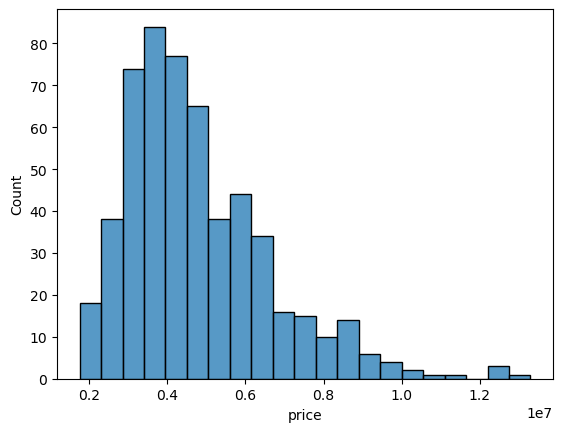

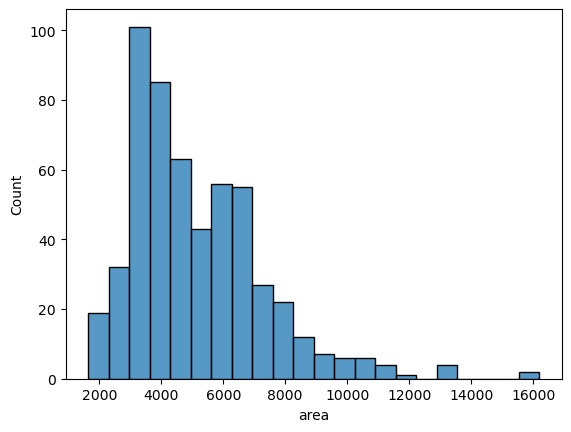

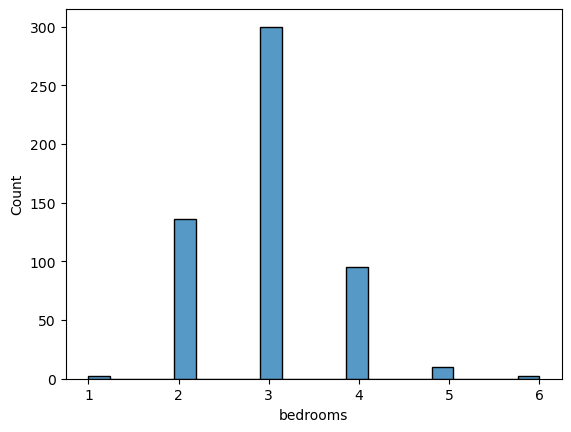

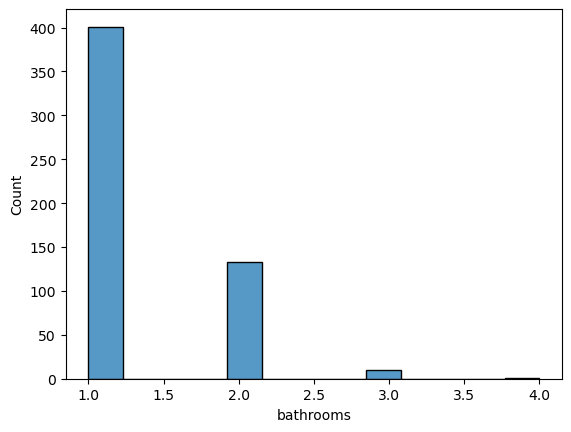

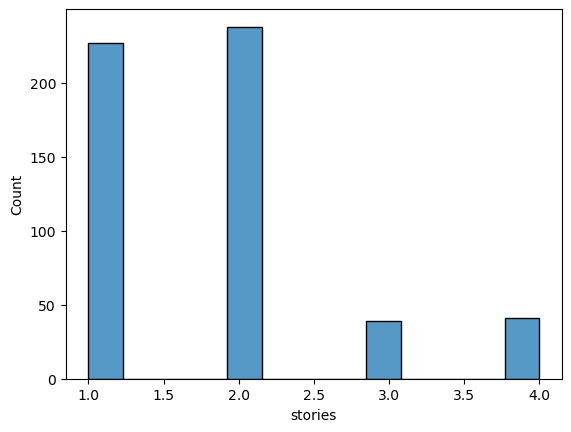

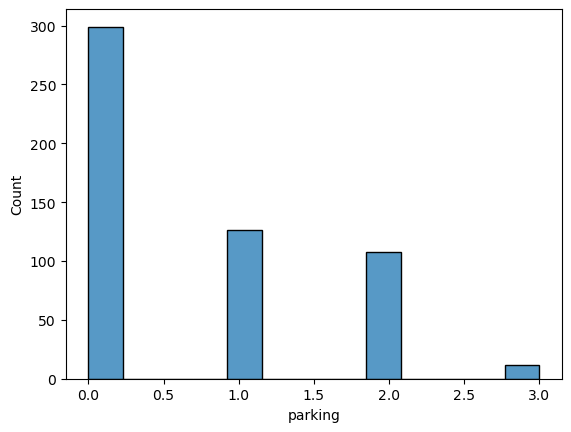

In [9]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.histplot(x=data[i])
        plt.show()

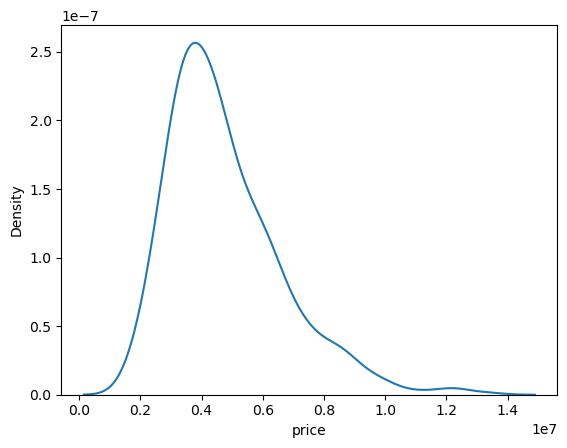

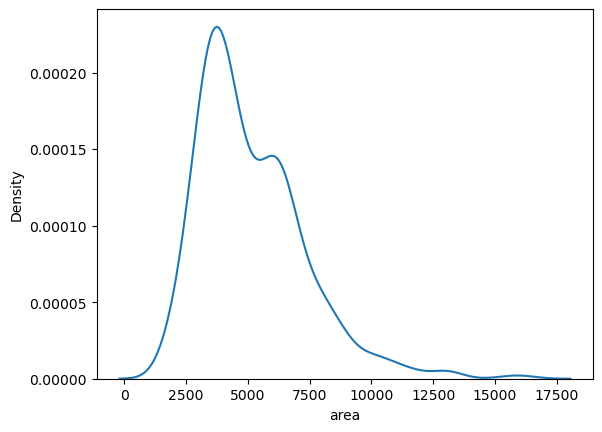

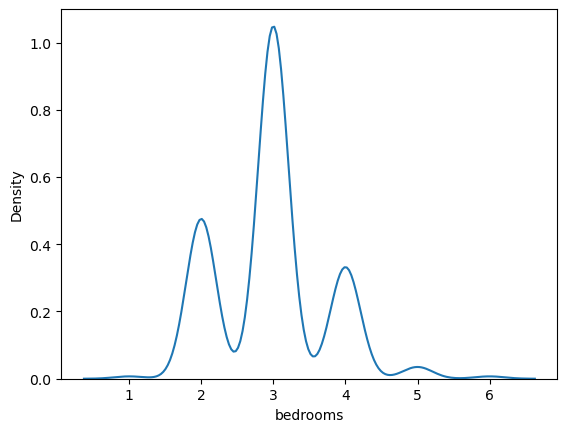

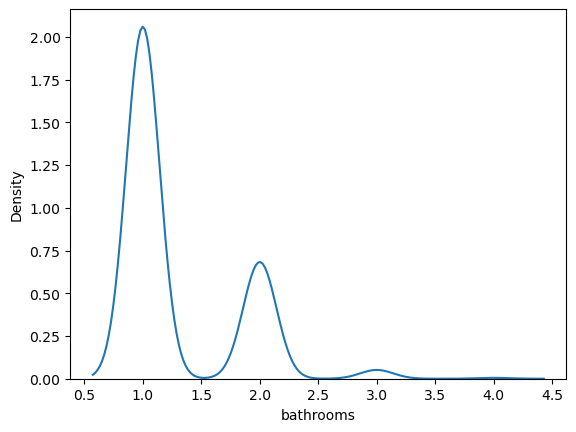

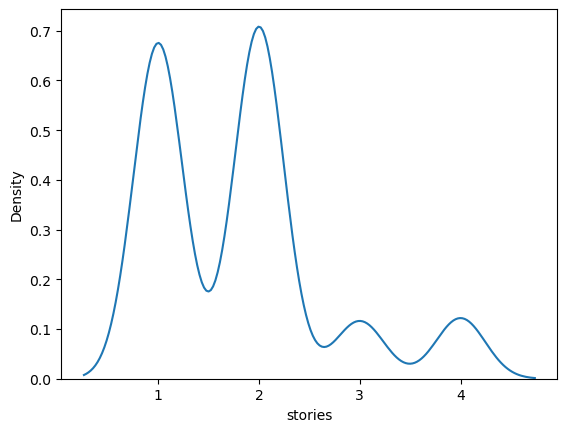

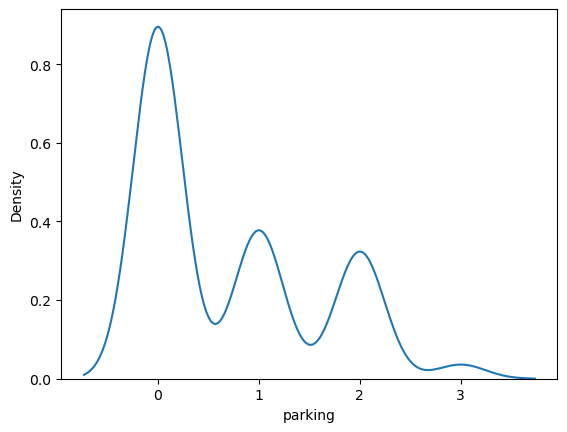

In [10]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.kdeplot(x=data[i])
        plt.show()

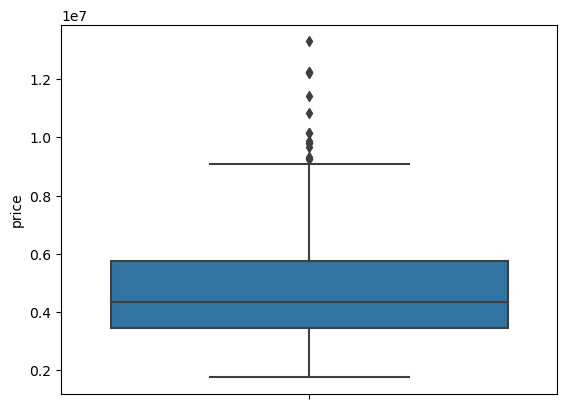

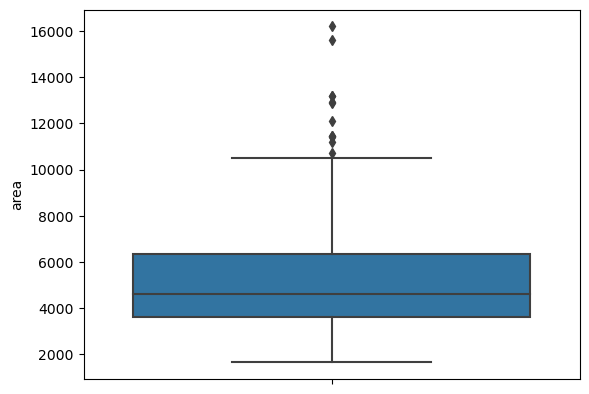

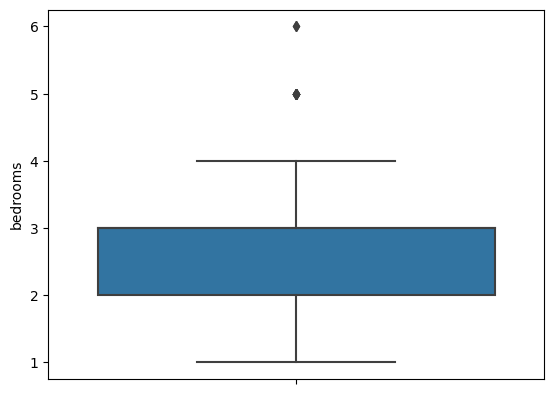

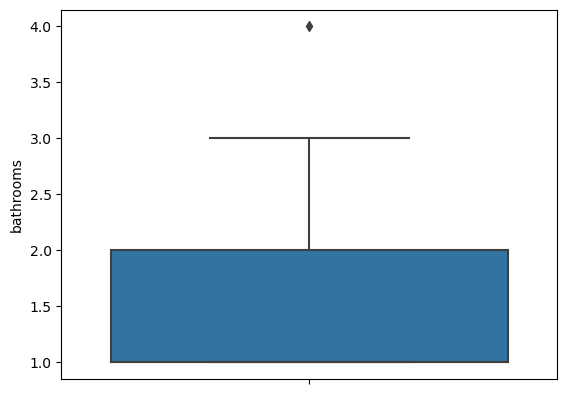

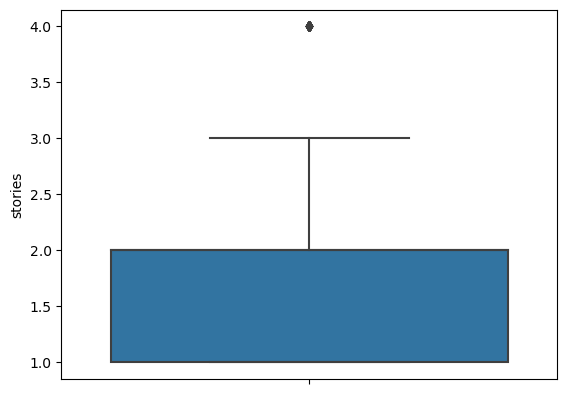

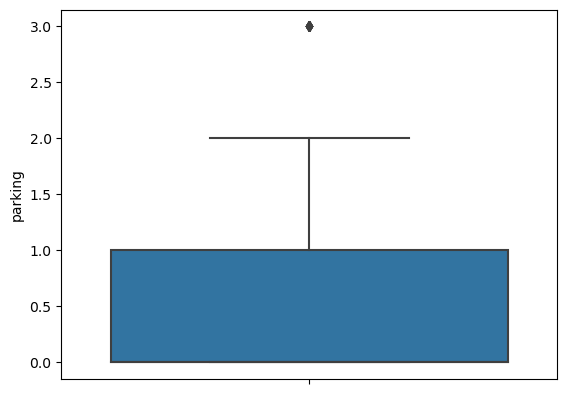

In [11]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(y=data[i])
        plt.show()

In [12]:
data['z_score']=stats.zscore(data.price)

In [13]:
cleaned_data=data[data['z_score']<3]
cleaned_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,z_score
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,2.880722
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,2.880722
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,2.730887
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,2.693428
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished,2.693428


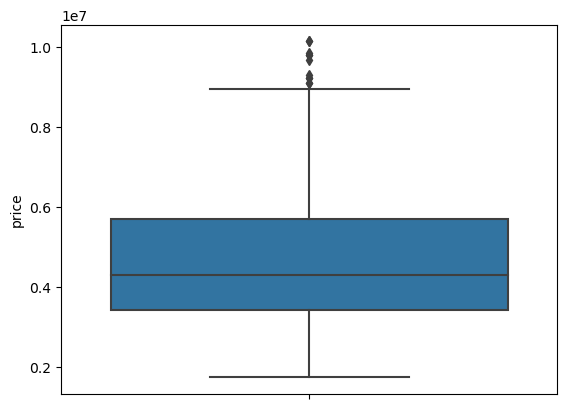

In [14]:
sns.boxplot(data=cleaned_data,y= 'price');

In [15]:
data.drop(columns='z_score',inplace=True)
data.sample()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
261,4473000,3510,3,1,2,yes,no,no,no,no,0,no,semi-furnished


In [16]:
le = LabelEncoder()

In [17]:
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])

In [18]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


#### Checking the correlation with the target 'Price'

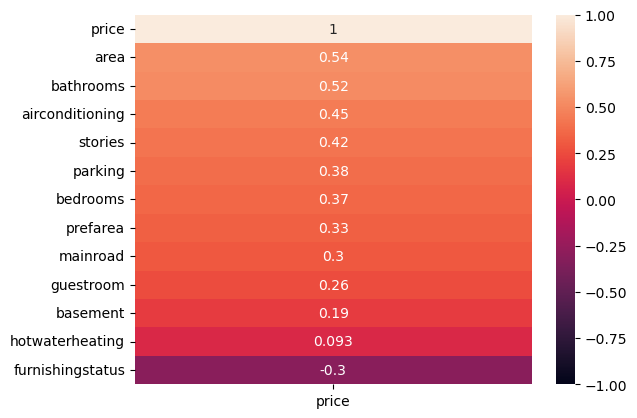

In [19]:
sns.heatmap(data.corr()[['price']].sort_values(by='price',ascending=False),vmax=1,vmin=-1,annot=True);

#### Lets take only the columns with good correlation with the target

In [20]:
data1 = data[['area','bathrooms','price']]
data1

,area,bathrooms,price
0,7420,2,13300000
1,8960,4,12250000
2,9960,2,12250000
3,7500,2,12215000
4,7420,1,11410000
...,...,...,...
540,3000,1,1820000
541,2400,1,1767150
542,3620,1,1750000
543,2910,1,1750000


In [21]:
x = data1.iloc[:,:-1].values
y = data1.iloc[:,-1].values

#### Feature scaling

In [22]:
sc = StandardScaler()

In [23]:
x = sc.fit_transform(x)

#### Model Building

In [24]:
models = {'LinearRegression':LinearRegression(),
         'Ridge': Ridge(),
         'Lasso': Lasso(),
         'DecisionTreeRegressor': DecisionTreeRegressor(),
         'AdaBootRegressor':AdaBoostRegressor(),
         'GradientBoostingRegressor': GradientBoostingRegressor(),
         'LinearSVR': LinearSVR(),
         'RandomForestRegressor': RandomForestRegressor()}

In [26]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring = 'neg_mean_squared_error',cv=10,n_jobs=-1)
    print('cross_validation_model :{}'.format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print('Average RMSE:',rmse_average)
    print("*"*100)


cross_validation_model :LinearRegression
Average RMSE: 1393429.8244661277
****************************************************************************************************
cross_validation_model :Ridge
Average RMSE: 1393148.111746144
****************************************************************************************************
cross_validation_model :Lasso
Average RMSE: 1393429.856737636
****************************************************************************************************
cross_validation_model :DecisionTreeRegressor
Average RMSE: 1730709.9597247094
****************************************************************************************************
cross_validation_model :AdaBootRegressor
Average RMSE: 1503248.9946344174
****************************************************************************************************
cross_validation_model :GradientBoostingRegressor
Average RMSE: 1429959.2785459892
*************************************************************